In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [21]:
df_data = pd.read_csv("df_configs_class.csv") #, dtype = {'range_p': list,'neurons_per_layer': list,
                                                      #'test_loss': list})
    
df_data['test_loss'] = df_data.test_loss.apply(literal_eval)
df_data['range_p'] = df_data.range_p.apply(literal_eval)
df_data['neurons_per_layer'] = df_data.neurons_per_layer.apply(literal_eval)

In [22]:
df_data

,Unnamed: 0,range_p,Num_nodes,Num_grafi_totali,learning_rate,batch_size,neurons_per_layer,correlations,error,test_loss,distance_of_means,batch_norm,num_epochs
0,0,"[0.05, 0.6]",260,1000,0.01,100,"[1, 8, 2]",NaN,NaN,[],18.186386,False,5000
1,1,"[0.05, 0.6]",260,1000,0.01,100,"[1, 8, 4]",NaN,NaN,[],16.427078,False,5000
2,2,"[0.05, 0.6]",260,1000,0.01,100,"[1, 8, 6]",NaN,NaN,[],21.620255,False,5000
3,3,"[0.05, 0.6]",260,1000,0.01,100,"[1, 8, 8]",NaN,NaN,[],20.769290,False,5000
4,4,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 2]",NaN,NaN,[],26.027100,False,5000
5,5,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 4]",NaN,NaN,[],14.875199,False,5000
6,6,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 6]",NaN,NaN,[],14.341354,False,5000
7,7,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 8]",NaN,NaN,[],18.005690,False,5000
8,8,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 10]",NaN,NaN,[],30.986004,False,5000
9,9,"[0.05, 0.6]",260,1000,0.01,100,"[1, 16, 12]",NaN,NaN,[],23.128508,False,5000


In [18]:
mask_8 = df_data['neurons_per_layer'].apply(lambda x: x[1])==8
mask_16 = df_data['neurons_per_layer'].apply(lambda x: x[1])==16
mask_32 = df_data['neurons_per_layer'].apply(lambda x: x[1])==32

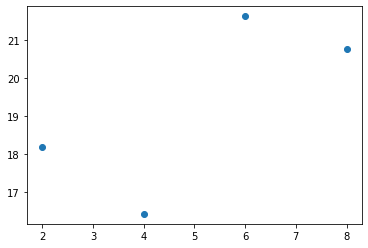

In [24]:
plt.scatter(df_data.loc[mask_8, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_8, 'distance_of_means'])

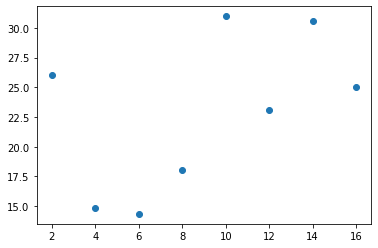

In [25]:
plt.scatter(df_data.loc[mask_16, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_16, 'distance_of_means'])

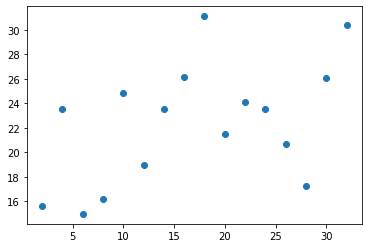

In [26]:
plt.scatter(df_data.loc[mask_32, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_32, 'distance_of_means'])

In [21]:
import numpy as np
from tensorboardX import SummaryWriter
writer = SummaryWriter()
for i in range(50):
    writer.add_histogram("moving_gauss", np.random.normal(i, i, 1000), i, bins="auto")
writer.close()